In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
from vit_keras import vit, utils
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing import image

2023-10-17 13:35:29.408831: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 13:35:29.508538: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-17 13:35:29.987581: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/kannika/miniconda3/envs/vit-tf/lib/
2023-10-17 13:35:29.987647: W tensorflow/com

# Load model

In [3]:
model_dir = "/media/tohn/HDD/rheology2023/ViTModel/Classification/Blood_Viscosity/HN-NBL_classes/fold1/R1/models/ViTb32_1Class_fold1_R1.h5"
model = keras.models.load_model(model_dir)
height = width = model.input_shape[1]
print(height, width)
model.summary()

2023-10-17 13:36:16.868730: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-17 13:36:17.280278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9631 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:65:00.0, compute capability: 7.5


384 384
Model: "ViT_BloodClass"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 384, 384, 3)]     0         
                                                                 
 embedding (Conv2D)          (None, 12, 12, 768)       2360064   
                                                                 
 reshape (Reshape)           (None, 144, 768)          0         
                                                                 
 class_token (ClassToken)    (None, 145, 768)          768       
                                                                 
 Transformer/posembed_input   (None, 145, 768)         111360    
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 145, 768),       7087872   
 (TransformerBlock)           (None, 12, Non

# DATA

In [4]:
fold = 1

In [5]:
df_2dFFT = pd.read_csv("/home/kannika/code/Rheology2023/Rheology_Blood/Dataset_Rheology_Blood_Viscosity_HN_NBL-2dFFTdataset-3channels-6Fold-splitclass.csv")
train_2dFFT = df_2dFFT[df_2dFFT['fold']!=fold].reset_index(drop=True)
print("Fold Train set", set(train_2dFFT['fold']))
print(train_2dFFT.shape)

test_2dFFT = df_2dFFT[df_2dFFT['fold']==fold].reset_index(drop=True)
print("Fold Test set", set(test_2dFFT['fold']))
print(test_2dFFT.shape)

test_2dFFT.head()

Fold Train set {2, 3, 4, 5, 6}
(240, 15)
Fold Test set {1}
(48, 15)


,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary
0,0,0,0,237,237,HN35_D0_30HZ_20XINF_UWELL_25660131_162433_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162433,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
1,1,1,1,234,234,HN35_D0_30HZ_20XINF_UWELL_25660131_161754_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_161754,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1
2,2,2,2,324,324,HN43_D0_30HZ_20XINF_UWELL_25660330_153259_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN43_D0_30HZ_20XINF_UWELL_25660330_153259,SSD_Backup,HN,HN43,No_Splenectomy,1,"[2, 5, 7]",1
3,3,3,3,268,268,HN38_D0_30HZ_20XINF_UWELL_25660223_145146_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN38_D0_30HZ_20XINF_UWELL_25660223_145146,SSD_Backup,HN,HN38,No_Splenectomy,1,"[2, 5, 7]",1
4,4,4,4,239,239,HN35_D0_30HZ_20XINF_UWELL_25660131_162844_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162844,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1


In [6]:
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0]
   # return result[0][1:]

In [7]:
img_path = test_2dFFT['image_path'].tolist()   ## path to list
### Predict
pred_list= []
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i]) 
    pred_list.append(predict)

2023-10-17 13:37:01.285100: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-10-17 13:37:01.631585: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 40ms/step


In [8]:
print(len(pred_list))
pred_list

48


[array([0.9093176], dtype=float32),
 array([0.9127257], dtype=float32),
 array([0.9128685], dtype=float32),
 array([0.91068935], dtype=float32),
 array([0.27942616], dtype=float32),
 array([0.90072984], dtype=float32),
 array([0.9133821], dtype=float32),
 array([0.91370016], dtype=float32),
 array([0.9127947], dtype=float32),
 array([0.90678054], dtype=float32),
 array([0.9070675], dtype=float32),
 array([0.90689754], dtype=float32),
 array([0.08862164], dtype=float32),
 array([0.08759451], dtype=float32),
 array([0.08846597], dtype=float32),
 array([0.08699109], dtype=float32),
 array([0.08686135], dtype=float32),
 array([0.08887763], dtype=float32),
 array([0.33064035], dtype=float32),
 array([0.08673433], dtype=float32),
 array([0.08876631], dtype=float32),
 array([0.09257296], dtype=float32),
 array([0.08901956], dtype=float32),
 array([0.0916121], dtype=float32),
 array([0.85609967], dtype=float32),
 array([0.08801311], dtype=float32),
 array([0.08987796], dtype=float32),
 array([

In [9]:
_pred_label = []
for m in pred_list:
    #print(m)
    for n in range(len(m)):
        #print(m[n])
        if m[n] >= 0.5:  ## Sigmoid(Z) >= 0.5, y=1
            #pred_label.append(1)
            _pred_label.append("HN") ## เป็นโรค
        else:
             _pred_label.append("NBL") ## ไม่เป็นโรค

In [10]:
print(len(_pred_label))
_pred_label

48


['HN',
 'HN',
 'HN',
 'HN',
 'NBL',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'HN',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'NBL',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN',
 'HN']

In [11]:
test_2dFFT["category"] = _pred_label
test_2dFFT.head(3)

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,image_name,image_path,image_folder,folder_source,classes,Code,subclass,fold,dt,classes_binary,category
0,0,0,0,237,237,HN35_D0_30HZ_20XINF_UWELL_25660131_162433_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_162433,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,HN
1,1,1,1,234,234,HN35_D0_30HZ_20XINF_UWELL_25660131_161754_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN35_D0_30HZ_20XINF_UWELL_25660131_161754,SSD_Backup,HN,HN35,No_Splenectomy,1,"[2, 5, 7]",1,HN
2,2,2,2,324,324,HN43_D0_30HZ_20XINF_UWELL_25660330_153259_dt2_...,/media/tohn/HDD/rheology2023/Blood_Viscosity_2...,HN43_D0_30HZ_20XINF_UWELL_25660330_153259,SSD_Backup,HN,HN43,No_Splenectomy,1,"[2, 5, 7]",1,HN


# Evaluation

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix

act = test_2dFFT['classes'].array
pred = test_2dFFT['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 93.75%
              precision    recall  f1-score   support

          HN       0.96      0.92      0.94        24
         NBL       0.92      0.96      0.94        24

    accuracy                           0.94        48
   macro avg       0.94      0.94      0.94        48
weighted avg       0.94      0.94      0.94        48



## Confusion matrix

Text(0.5, 21.249999999999993, 'Predicted label')

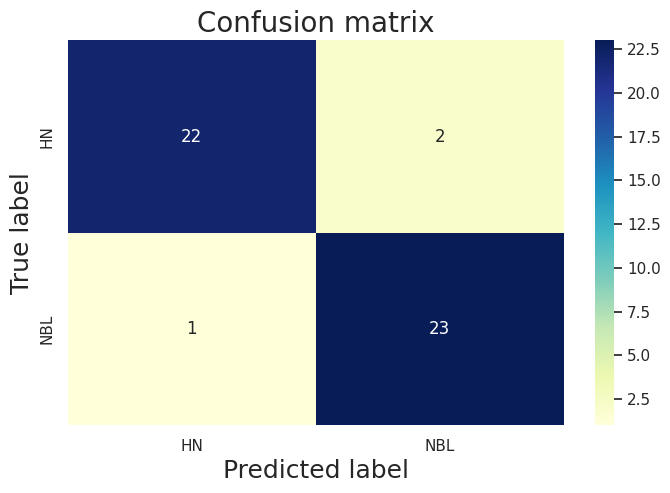

In [13]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)